---
# **Project** : **Face stylization on image and video**
---
### ---> **Sahil Kumar 777**

This project performs face stylization using mediapipe framework. The output can be used to cretate styles photo, and can be used in various applications like to create artistic photo and apply facial filters and effects to create a virtual avatar..

* **Objective :-** Face stylization, filters and virtual avatars
* **Modules :-** openCV, Mediapipe


## Install Important Libraries

In [1]:
pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 18.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
ydf 0.12.0 requires protobuf<6.0.0,>=5.29.1, but you have prot

## Functions to visualize results

### Face Landmark Visualization function for images

### Generete and Save Video from ImageList

In [1]:
# Convert To Video

import cv2
import mediapipe as mp

def visualize_video(filename,images) :
  """ Function to generate video from list of images.
      Args:
          filename
          images
      Return :
          It returns filename """

  imagesList = [image for image in images]

  # Define the codec and create a VideoWriter object
  fourcc = cv2.VideoWriter_fourcc(*'VP80')  # Can use other codecs like 'mp4v' (for .mp4 files) but mp4 converted files are not supported by coalb and browsers
  fps = 30  # Frames per second
  height, width, _ = imagesList[0].shape

  # Open VideoWriter
  video_writer =  cv2.VideoWriter(filename, fourcc, fps, (width, height))

  # Display gestures and hand landmarks.
  for image in imagesList:
    annotated_image = image.copy()
    video_writer.write(annotated_image)
  video_writer.release() # Closes VideoWriter
  return filename

### Function to Play Video In Colab

In [2]:
from IPython.display import HTML
from base64 import b64encode

def play_video_in_colab(filepath) :

  with open(filepath,'rb') as file :
    mp4 = file.read()
    data_url = "data:video/"+ filepath.split('.')[-1] +";base64,"  + b64encode(mp4).decode()

  return HTML("""
    <video src="%s" type="video/webm" width="640" height="480" controls autoplay>
    </video>
  """  % data_url)

## Image face stylization


In [12]:
## Load the pre trained model
# Color Sketch
!wget -O face_stylizer1.task -q https://storage.googleapis.com/mediapipe-models/face_stylizer/blaze_face_stylizer/float32/latest/face_stylizer_color_sketch.task

# Color Ink
!wget -O face_stylizer2.task -q https://storage.googleapis.com/mediapipe-models/face_stylizer/blaze_face_stylizer/float32/latest/face_stylizer_color_ink.task

# Oil Painting
!wget -O face_stylizer3.task -q https://storage.googleapis.com/mediapipe-models/face_stylizer/blaze_face_stylizer/float32/latest/face_stylizer_oil_painting.task

In [15]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow

filter_1 ="face_stylizer1.task"
filter_2 ="face_stylizer2.task"
filter_3 ="face_stylizer3.task"

myImage = "SahilProfilePic.png"

def apply_art(filepath,model_path):
  BaseOptions = mp.tasks.BaseOptions
  FaceStylizer = mp.tasks.vision.FaceStylizer
  FaceStylizerOptions = mp.tasks.vision.FaceStylizerOptions

  model_path = model_path

  # Create a face stylizer instance with the image mode:
  options = FaceStylizerOptions(base_options=BaseOptions(model_asset_path=model_path))

  # STEP 1: Initialize the detector
  with FaceStylizer.create_from_options(options) as stylizer:

    image = mp.Image.create_from_file(filepath) # Returns SRGBA format image

    # Convert the frame received from OpenCV to a MediaPipe’s Image object.
    # mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=image.numpy_view())

    # STEP 4: Recognize gestures in the input image.
    stylized_result = stylizer.stylize(image)

    # STEP 5: Process the result. In this case, visualize it.
    n = cv2.cvtColor(stylized_result.numpy_view(), cv2.COLOR_RGBA2BGR)
    # annotated_image = draw_landmarks_on_image(n, detection_result)
    # cv2_imshow(annotated_image)
    cv2_imshow(n)

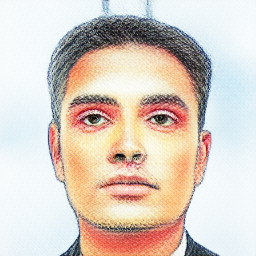

In [16]:
apply_art(myImage,filter_1)

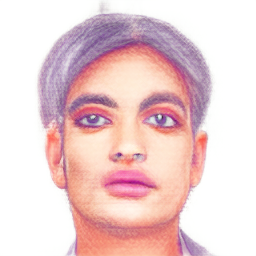

In [17]:
apply_art(myImage,filter_2)

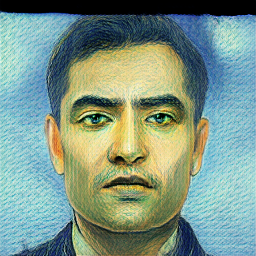

In [18]:
apply_art(myImage,filter_3)

## Video face stylization


In [19]:
import cv2
import mediapipe as mp

BaseOptions = mp.tasks.BaseOptions
FaceStylizer = mp.tasks.vision.FaceStylizer
FaceStylizerOptions = mp.tasks.vision.FaceStylizerOptions

model_path = filter_1

# Create a face stylizer instance with the image mode:
options = FaceStylizerOptions(base_options=BaseOptions(model_asset_path=model_path))

In [21]:
### Guesture Recognition and Handpints Detection

# STEP 1: Initialize the detector
with FaceStylizer.create_from_options(options) as stylizer:

  # STEP 2: Intialize the video capturing into frames
  cap = cv2.VideoCapture('InputVideo.mp4')
  fps = cap.get(cv2.CAP_PROP_FPS)
  images=[]
  results=[]
  i=0

  while cap.isOpened():

    # STEP 3: Read the frames one by one
    success,frame = cap.read();

    if not success :
      if i==0:
        print('Empty frame')
      else :
        print('Detection Completed')
        print('Total Frames : ',i)
      break

    # Convert the frame received from OpenCV to a MediaPipe’s Image object.
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame)

    # STEP 4: Recognize gestures in the input image.
    stylized_result = stylizer.stylize(mp_image)

    # STEP 5: Process the result. In this case, visualize it.
    print(i)
    if stylized_result != None :
      n = cv2.cvtColor(stylized_result.numpy_view(), cv2.COLOR_RGBA2BGR)
      images.append(n)
    else :
      print("Skiped")
    i+=1
  cap.release()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
Skiped
130
131
Skiped
131
Skiped
131
Skiped
131
Skiped
131
Skiped
131
Skiped
131
Skiped
131
Skiped
131
Skiped
131
Skiped
131

In [22]:
visualize_video('OutputVideo1.webm',images)

'OutputVideo1.webm'

In [23]:
play_video_in_colab('OutputVideo1.webm')